In [1]:
 import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
# Currency pair exchange rates for CAD/JPY
CAD_JPY = pd.read_csv(("cad_jpy.csv"), index_col="Date", infer_datetime_format = True, parse_dates = True)
CAD_JPY.head

<bound method NDFrame.head of              Price    Open    High     Low
Date                                      
1982-01-05  184.65  184.65  184.65  184.65
1982-01-06  185.06  185.06  185.06  185.06
1982-01-07  186.88  186.88  186.88  186.88
1982-01-08  186.58  186.58  186.58  186.58
1982-01-11  187.64  187.64  187.64  187.64
...            ...     ...     ...     ...
2020-05-29   78.29   78.21   78.41   77.75
2020-06-01   79.27   78.21   79.36   78.04
2020-06-02   80.40   79.26   80.56   79.15
2020-06-03   80.70   80.40   80.82   79.96
2020-06-04   80.71   80.80   80.89   80.51

[9966 rows x 4 columns]>

In [3]:
# Trim the dataset to begin on January 1st, 1990
CAD_JPY = CAD_JPY.loc["1990-01-01":, :]
CAD_JPY.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


<AxesSubplot:title={'center':'CAD/JPY Exchange Rates'}, xlabel='Date'>

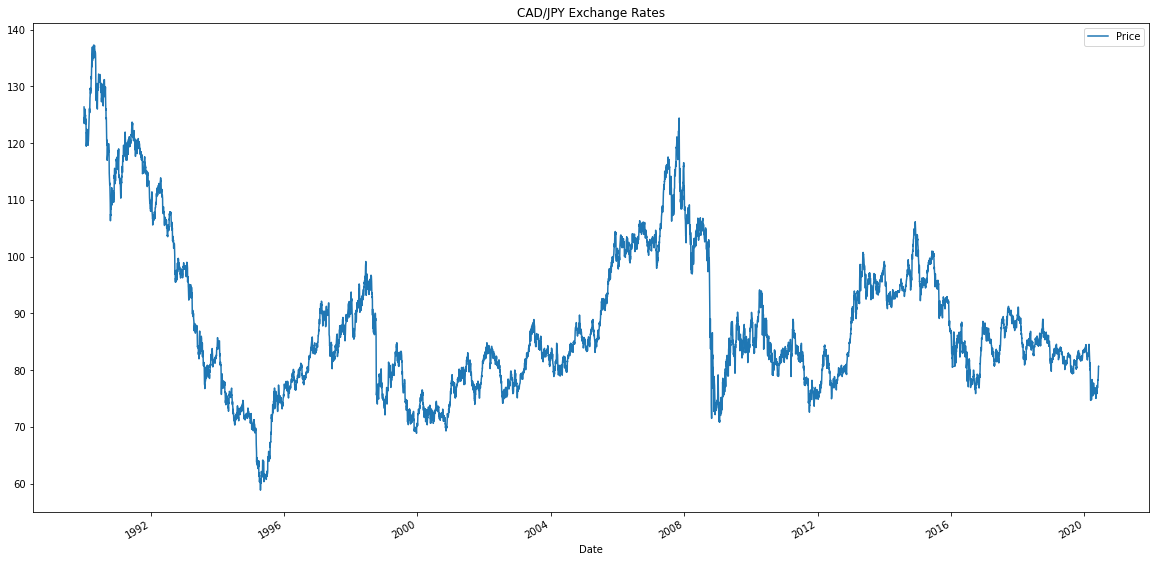

In [4]:
# Plot just the "Price" column from the dataframe:
CAD_JPY.Price.plot(figsize=[20,10], title = "CAD/JPY Exchange Rates", legend = True, xlabel = "Date")

In [ ]:
#Question: Do you see any patterns, long-term and/or short?
# Based on the chart provided I do not see too many trends. 
# However we do seem to be having overall lower highs and higher lows, forming a triangle.

In [8]:
# Decomposition Using a Hodrick-Prescott Filter
import statsmodels.api as sm
# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
Times_Series_Noise, Times_Series_Trend = sm.tsa.filters.hpfilter(CAD_JPY["Price"])
Times_Series_Trend.head()

Date
1990-01-02    125.850905
1990-01-03    125.679684
1990-01-04    125.508788
1990-01-05    125.338304
1990-01-08    125.167037
Name: Price_trend, dtype: float64

In [16]:
df_CAD_JPY = pd.concat([Times_Series_Noise, Times_Series_Trend, CAD_JPY["Price"]], axis="columns")
df_CAD_JPY

,Price_cycle,Price_trend,Price
Date,,,
1990-01-02,0.519095,125.850905,126.37
1990-01-03,-0.379684,125.679684,125.30
1990-01-04,-2.048788,125.508788,123.46
1990-01-05,-0.798304,125.338304,124.54
1990-01-08,-0.897037,125.167037,124.27
...,...,...,...
2020-05-29,-0.503961,78.793961,78.29
2020-06-01,0.218939,79.051061,79.27
2020-06-02,1.088117,79.311883,80.40


In [18]:
df_CAD_JPY.columns=["Noise", "Trend", "Price"]
df_CAD_JPY

,Noise,Trend,Price
Date,,,
1990-01-02,0.519095,125.850905,126.37
1990-01-03,-0.379684,125.679684,125.30
1990-01-04,-2.048788,125.508788,123.46
1990-01-05,-0.798304,125.338304,124.54
1990-01-08,-0.897037,125.167037,124.27
...,...,...,...
2020-05-29,-0.503961,78.793961,78.29
2020-06-01,0.218939,79.051061,79.27
2020-06-02,1.088117,79.311883,80.40


In [19]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
df_CAD_JPY_2015 = df_CAD_JPY.loc["2015-01-01":, :]
df_CAD_JPY_2015.head()

,Noise,Trend,Price
Date,,,
2015-01-01,1.523927,101.596073,103.12
2015-01-02,0.945717,101.304283,102.25
2015-01-05,0.708200,100.991800,101.70
2015-01-06,-0.620865,100.660865,100.04
2015-01-07,0.615839,100.314161,100.93


<AxesSubplot:title={'center':'Price vs. Trend'}, xlabel='Date'>

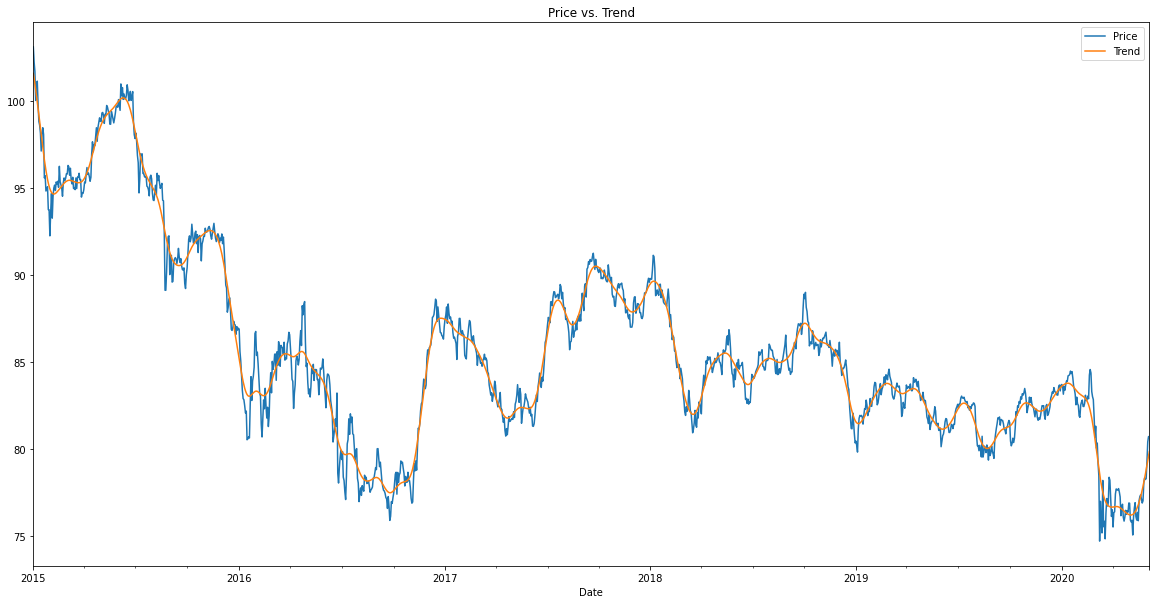

In [22]:
df_CAD_JPY_2015.plot(y=["Price", "Trend"], figsize = [20,10], title="Price vs. Trend", xlabel = "Date")

In [23]:
#  Question: Do you see any patterns, long-term and/or short?
# We can see that the Price fluctuates from the trend on the short term.
# This could suggest a good buying opportunity when the blue line is below the Orange and 
# A good selling time when the blue line is above the Orange.

<AxesSubplot:title={'center':'Noise 1990-Present'}, xlabel='Date'>

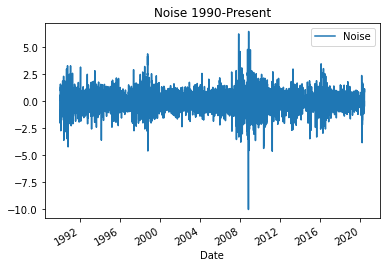

In [26]:
# Plot the settle noise
# Was not sure if this was based on 2015 or full time period.
df_CAD_JPY.plot(y=["Noise"], title = "Noise 1990-Present")

<AxesSubplot:title={'center':'Noise 2015-Present'}, xlabel='Date'>

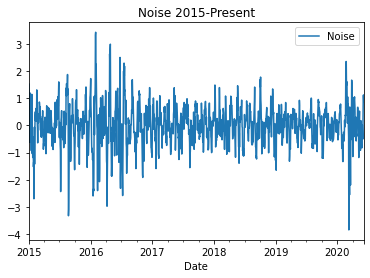

In [27]:
df_CAD_JPY_2015.plot(y=["Noise"], title="Noise 2015-Present")

In [30]:
# Forecasting Returns using an ARMA Model
# Create a series using "Price" percentage returns, drop any nan"s, and check the results

Returns = (CAD_JPY[["Price"]].pct_change()*100)
Returns = Returns.replace(-np.inf, np.nan).dropna()
Returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [32]:
# Estimate and ARMA model using statsmodels (use order=(2, 1))
from statsmodels.tsa.arima_model import ARMA
ARMA_Model = ARMA(Returns.values, order=(2,1))

In [33]:
# Fit the model and assign it to a variable called results
Results = ARMA_Model.fit()

In [34]:
#Output model summary results
Results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7928
Model:                     ARMA(2, 1)   Log Likelihood               -9751.978
Method:                       css-mle   S.D. of innovations              0.828
Date:                Thu, 22 Jul 2021   AIC                          19513.955
Time:                        11:41:18   BIC                          19548.846
Sample:                             0   HQIC                         19525.903
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.009     -0.245      0.807      -0.020       0.016
ar.L1.y       -0.8547      0.164     -5.200      0.000      -1.177      -0.533
ar.L2.y       -0.0197      0.013     -1.475      0.140      -0.046       0.006
ma.L1.y        0.8246      0.164      5.030      0.000       0.503       1.146
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2033           +0.0000j            1.2033            0.5000
AR.2          -42.1698           +0.0000j           42.1698            0.5000
MA.1           -1.2127           +0.0000j            1.2127            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Day Returns Forecast'}>

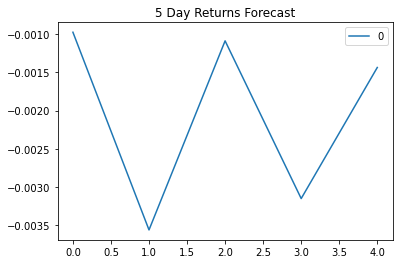

In [38]:
# Plot the 5 Day Returns Forcast
pd.DataFrame(Results.forecast(steps=5)[0]).plot(title = "5 Day Returns Forecast")

In [39]:
# Forecasting the Exchange Rate Price using an ARIMA Model
from statsmodels.tsa.arima_model import ARIMA
# Estimate and ARIMA Model:
ARIMA_Model = ARIMA(CAD_JPY["Price"], order = (5, 1, 1))
ARIMA_Results = ARIMA_Model.fit()


/Users/coleosborne/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/coleosborne/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [42]:
ARIMA_Results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 7928
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8745.622
Method:                       css-mle   S.D. of innovations              0.729
Date:                Thu, 22 Jul 2021   AIC                          17507.244
Time:                        11:55:07   BIC                          17563.070
Sample:                             1   HQIC                         17526.361
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0058      0.008     -0.743      0.458      -0.021       0.009
ar.L1.D.Price     0.4287      0.246      1.740      0.082      -0.054       0.912
ar.L2.D.Price     0.0177      0.014      1.264      0.206      -0.010       0.045
ar.L3.D.Price    -0.0118      0.012     -0.959      0.337      -0.036       0.012
ar.L4.D.Price     0.0110      0.012      0.879      0.379      -0.013       0.035
ar.L5.D.Price    -0.0191      0.011     -1.702      0.089      -0.041       0.003
ma.L1.D.Price    -0.4568      0.246     -1.855      0.064      -0.939       0.026
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7660           -0.7703j            1.9266           -0.0655
AR.2            1.7660           +0.7703j            1.9266            0.0655
AR.3           -2.3649           -0.0000j            2.3649           -0.5000
AR.4           -0.2974           -2.4212j            2.4394           -0.2695
AR.5           -0.2974           +2.4212j            2.4394            0.2695
MA.1            2.1894           +0.0000j            2.1894            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'ARIMA Model 5 DAy Price Forecast'}>

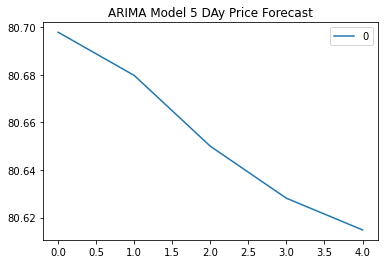

In [43]:
# Plot the 5 Day Price Forecast
pd.DataFrame(ARIMA_Results.forecast(steps=5)[0]).plot(title = "ARIMA Model 5 DAy Price Forecast")

In [44]:
#Question: What does the model forecast will happen to the Japanese Yen in the near term?

#Answer: It appears like the Japanese Yen will continue in a downward trend over the near future.

In [51]:
# Volatility Forecasting with GARCH
import arch as arch 
from arch import arch_model
# needed "from arch import arch_model" to run code

In [52]:
# Estimate a GARCH model:
Arch_Model = arch_model(Returns["Price"], mean="Zero", vol="GARCH", p=2, q=1)

In [55]:
# Fit the model
Arch_Results = Arch_Model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 46548.40924082976
Iteration:      2,   Func. Count:     16,   Neg. LLF: 569545243.4284524
Iteration:      3,   Func. Count:     22,   Neg. LLF: 8928.838552966728
Iteration:      4,   Func. Count:     27,   Neg. LLF: 11769.086094978014
Iteration:      5,   Func. Count:     33,   Neg. LLF: 10426.350185312931
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8916.366479560163
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8911.111921464748
Iteration:      8,   Func. Count:     52,   Neg. LLF: 8911.027336222945
Iteration:      9,   Func. Count:     57,   Neg. LLF: 8911.02203125968
Iteration:     10,   Func. Count:     62,   Neg. LLF: 8911.021014202204
Iteration:     11,   Func. Count:     67,   Neg. LLF: 8911.020776838068
Iteration:     12,   Func. Count:     72,   Neg. LLF: 8911.020764888566
Iteration:     13,   Func. Count:     76,   Neg. LLF: 8911.02076489123
Optimization terminated successfully    (Exit mode 0)
          

In [56]:
Arch_Results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Thu, Jul 22 2021   Df Residuals:                     7928
Time:                        12:05:18   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0733e-03  2.545e-03      3.566  3.628e-04  [4.086e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.682e-04  [2.647e-02,9.841e-02]
alpha[2]       0.0000  2.010e-02      0.000      1.000 [-3.940e-02,3.940e-02]
beta[1]        0.9243  1.229e-02     75.205      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

In [58]:
#Find the last day of the data set
Last_Day = Returns.index.max().strftime("%Y-%m-%d")
Last_Day

'2020-06-04'

In [59]:
# Create a 5 day forecast of volatility
Forecast_Horizon = 5

In [61]:
# Start the forecast using the last_day calculated above
Forecast = Arch_Results.forecast(start=Last_Day, horizon = Forecast_Horizon)
Forecast

In [62]:
# Annualize the forecast
Intermidiate = np.sqrt(Forecast.variance.dropna()*252)
Intermidiate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566035,12.573725,12.581308,12.588786,12.596161


In [63]:
# Transpose the forecast so that it is easier to plot
Final = Intermidiate.dropna().T
Final.head()

Date,2020-06-04
h.1,12.566035
h.2,12.573725
h.3,12.581308
h.4,12.588786
h.5,12.596161


<AxesSubplot:title={'center':'5 Day Forecast of Volatility'}>

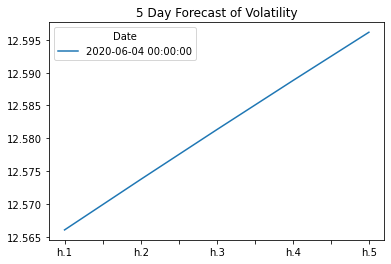

In [65]:
# Plot the Final Forecast
Final.plot(title="5 Day Forecast of Volatility")

In [66]:
#Question: What does the model forecast will happen to volatility in the near term?
# Answer: It Appears that Volatility will continue to increase in the short term.

In [ ]:
# Conclusions
# In Conclusion, I would personally not buy Yen now. It looks like Yen will continue to lose value in the near term and with the increase in volatility I will stay away for the time being.